In [22]:
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Import libraries
# (Already imported above)

# Step 2: List all .txt files in the folder with specific suffixes
folder_path = '/Users/joshuaingram/Main/Projects/SolarFlareNN/data/designaled/'  # Replace with your folder path
suffixes = ['_g18_bg', '_g17_bg', '_g16_bg']
dfs = {}

# Combine Wavelet-Derived Flux Noise

In [23]:
for suffix in suffixes:
    txt_files = [f for f in os.listdir(folder_path) if f.endswith(f"{suffix}.txt")]
    
    # Step 3: Read each .txt file into a DataFrame
    temp_dfs = []
    for txt_file in txt_files:
        file_path = os.path.join(folder_path, txt_file)
        df = pd.read_csv(file_path, header=None, delim_whitespace=True, names=['secs_since_2000', f'designaled_flux{suffix}'])
        temp_dfs.append(df)
        
    # Step 4: Concatenate DataFrames with the same suffix
    dfs[suffix] = pd.concat(temp_dfs, ignore_index=True)

In [24]:
# Step 5: Sort each DataFrame by the date column
for suffix, df in dfs.items():
    dfs[suffix] = df.sort_values(by='secs_since_2000')

# Step 6: Merge all DataFrames on 'date_seconds'
final_df = dfs['_g18_bg']
for suffix in ['_g17_bg', '_g16_bg']:
    final_df = pd.merge(final_df, dfs[suffix], on='secs_since_2000', how='outer')

# Step 7: Convert the date column to date-time format
epoch_start = datetime(2000, 1, 1, 12)
final_df['date_time'] = final_df['secs_since_2000'].apply(lambda x: epoch_start + timedelta(seconds=x))
final_df.sort_values(by='secs_since_2000', inplace=True)

# Step 9: Create new column that takes the flux from the satellite with the highest flux that is not missing
def max_flux(row):
    flux_values = [row[f'designaled_flux{suffix}'] for suffix in ['_g18_bg', '_g17_bg', '_g16_bg']]
    non_na_flux_values = [flux for flux in flux_values if not pd.isna(flux)]
    return max(non_na_flux_values) if non_na_flux_values else None

final_df['designaled_flux'] = final_df.apply(max_flux, axis=1)

# Function to add random numbers to flux values in DataFrame
def add_random_to_flux(df):
    # Define the three random numbers
    random_numbers = [10**-7.5, 10**-6.5, 10**-5.5]
    
    # Generate random choices for each row in the flux column
    random_choices = np.random.choice(random_numbers, size=len(df))
    
    # Add the random choices to the flux column
    df['designaled_flux'] += random_choices
    
    return df

# final_df = add_random_to_flux(final_df)

final_dfA = final_df.copy()
final_dfA['designaled_flux'] += 10**(-7.5)
final_dfB = final_df.copy() 
final_dfB['designaled_flux'] += 10**(-6.5)
final_dfC = final_df.copy() 
final_dfC['designaled_flux'] += 10**(-5.75)

# Step 10: Save the final DataFrame to a .csv file
final_dfA.to_csv('Goes161718_wavelet_designaled_flux_Aclass.csv', index=False)
final_dfB.to_csv('Goes161718_wavelet_designaled_flux_Bclass.csv', index=False)
final_dfC.to_csv('Goes161718_wavelet_designaled_flux_Cclass.csv', index=False)

# Show the first few rows of the final DataFrame
print(final_df.head())

         secs_since_2000  designaled_flux_g18_bg  designaled_flux_g17_bg  \
4164291      539697600.0                     NaN                     NaN   
4164292      539697660.0                     NaN                     NaN   
4164293      539697720.0                     NaN                     NaN   
4164294      539697780.0                     NaN                     NaN   
4164295      539697840.0                     NaN                     NaN   

         designaled_flux_g16_bg           date_time  designaled_flux  
4164291            1.598873e-09 2017-02-07 00:00:00     1.598873e-09  
4164292            9.642111e-10 2017-02-07 00:01:00     9.642111e-10  
4164293           -2.792265e-09 2017-02-07 00:02:00    -2.792265e-09  
4164294            2.526616e-09 2017-02-07 00:03:00     2.526616e-09  
4164295            2.494040e-09 2017-02-07 00:04:00     2.494040e-09  


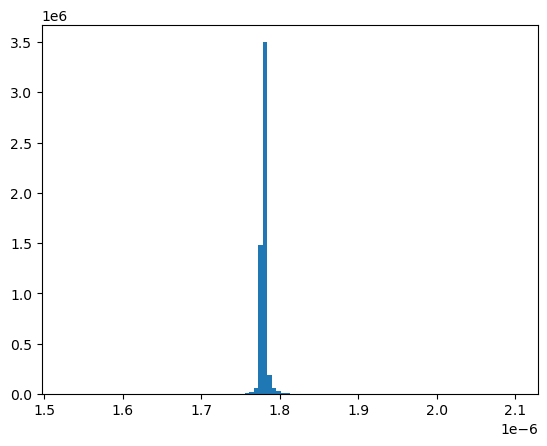

In [28]:
# plot distribution of flux values
plt.hist(final_dfC['designaled_flux'], bins=100)
plt.show()

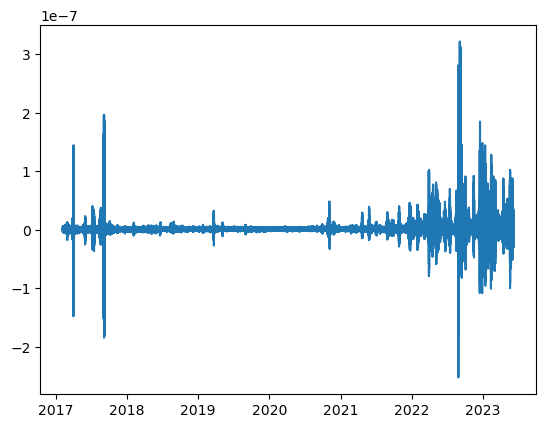

In [29]:
# plot flux values over time
plt.plot(final_dfC['date_time'], final_df['designaled_flux'])
plt.show()

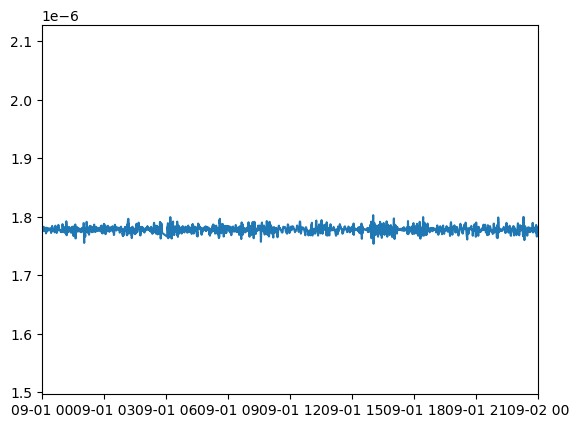

In [30]:
# plot flux values over time (zoomed in)
plt.plot(final_dfC['date_time'], final_dfC['designaled_flux'])
plt.xlim(datetime(2017, 9, 1), datetime(2017, 9, 2))
plt.show()